In [11]:
import sklearn.datasets
import random
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
import matplotlib.pyplot as plt
import tqdm
import warnings

np.random.seed(42)

## 1. Loading data and performing train test split

In [12]:
boston = sklearn.datasets.load_boston()
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


C:\Users\gozde\.conda\envs\dev_proj\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housin

In [13]:
X = pd.DataFrame(boston.data, columns = boston.feature_names)
y = boston.target

In [14]:
print(X.head())
print(y[:5])

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  
[24.  21.6 34.7 33.4 36.2]


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## 2. Fitting regression models

In [16]:
ols = LinearRegression()
ols.fit(X_train, y_train)
ols_yhat = ols.predict(X_test)
ols_mae = mean_absolute_error(y_true=y_test, y_pred = ols_yhat)
ols_mse = mean_squared_error(y_true=y_test, y_pred=ols_yhat)

In [17]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
rfr_yhat = rfr.predict(X_test)
rfr_mae = mean_absolute_error(y_true=y_test, y_pred=rfr_yhat)
rfr_mse = mean_squared_error(y_true=y_test, y_pred=rfr_yhat)

In [18]:
print(f"1. Ordinary Least Squares \n \t mae: {ols_mae}, mse: {ols_mse}")
print(f"2. Random Forest Regression \n \t mae: {rfr_mae}, mse: {rfr_mse}")

1. Ordinary Least Squares 
 	 mae: 3.1890919658878363, mse: 24.291119474973478
2. Random Forest Regression 
 	 mae: 2.136382352941176, mse: 9.867437068627442


## 3. Introducing missing values

In [19]:
def get_filled_na_random(data, na_perc):
    df = data.copy()
    idx = [(row, col) for row in range(df.shape[0]) for col in range(df.shape[1])]
    for row, col in random.sample(idx, int(na_perc*len(idx))):
        df.iat[row, col] = np.NaN
    return df

In [20]:
get_filled_na_random(X_train, 0.5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.02340,0.0,18.10,0.0,NaN,NaN,97.3,2.1007,NaN,NaN,NaN,349.48,NaN
15,0.62739,NaN,NaN,0.0,NaN,NaN,NaN,NaN,4.0,307.0,21.0,395.62,8.47
332,NaN,NaN,6.06,NaN,NaN,6.031,23.3,NaN,1.0,304.0,NaN,NaN,NaN
423,7.05042,NaN,18.10,NaN,0.614,NaN,NaN,2.0218,24.0,NaN,20.2,2.52,23.29
19,0.72580,NaN,8.14,0.0,NaN,5.727,NaN,NaN,4.0,NaN,NaN,390.95,11.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,NaN,0.0,NaN,NaN,NaN,NaN,91.9,NaN,5.0,NaN,NaN,395.67,18.66
270,NaN,20.0,6.96,NaN,NaN,NaN,42.1,NaN,NaN,223.0,18.6,NaN,13.00
348,NaN,80.0,2.01,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,390.94,5.99
435,11.16040,NaN,NaN,0.0,NaN,6.629,NaN,2.1247,NaN,NaN,NaN,NaN,NaN


## 4. Assess the impact of missing data removal / imputation on the regression model errors (MAE, MSE)

In [21]:
def check_regressor(reg, X_train, X_test, y_train, y_test):
    reg.fit(X_train, y_train)
    reg_yhat = reg.predict(X_test)
    reg_mae = mean_absolute_error(y_true=y_test, y_pred = reg_yhat)
    reg_mse = mean_squared_error(y_true=y_test, y_pred=reg_yhat)
    return reg_mae, reg_mse

In [25]:
na_percs = [0.01, 0.05, 0.1, 0.12, 0.15, 0.17, 0.2] # more values to make experimets more reliable

error_metrics_count = 2
regressors_count = 2
na_handling_methods_vount = 5

results = pd.DataFrame({
    "error_metric": ["mae"] * na_handling_methods_vount * regressors_count + ["mse"] * na_handling_methods_vount * regressors_count,
    "na_method": (["removing"] * regressors_count + ["mean"] * regressors_count + ["median"] * regressors_count + ["iterative"] * regressors_count + ["knn"] * regressors_count) * error_metrics_count,
    "regressor": ["ols", "rfr"] * na_handling_methods_vount * regressors_count
})

results[na_percs] = 0

results.set_index(["error_metric", "na_method", "regressor"], inplace=True)

In [26]:
def check_method(method, X_train, X_test, y_train, y_test):
    mae, mse = check_regressor(LinearRegression(), X_train, X_test, y_train, y_test)
    results.loc[("mae", method, "ols"), na_perc] += mae
    results.at[("mse", method, "ols"), na_perc] += mse
    mae, mse  = check_regressor(RandomForestRegressor(), X_train, X_test, y_train, y_test)
    results.loc[("mae", method, "rfr"), na_perc] += mae
    results.at[("mse", method, "rfr"), na_perc] += mse


L = 30 # computing L times and averaging the calculate error to get more reliable results (decrease L to perform faster)

for i in tqdm.tqdm(range(L)):
    for na_perc in na_percs:
        X_train_na = get_filled_na_random(X_train, na_perc)

        # removing rows 
        X_train_rem = X_train_na.dropna()
        y_train_rem = y_train[X_train_na.isna().sum(axis = 1) == 0]
        check_method("removing", X_train_rem, X_test, y_train_rem, y_test)
            
        # mean imputation
        mean_imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
        mean_imputer.fit(X_train_na)
        X_train_mean = pd.DataFrame(mean_imputer.transform(X_train_na), columns = X_train.columns)
        check_method("mean", X_train_mean, X_test, y_train, y_test)

        # median imputation
        median_imputer = SimpleImputer(missing_values=np.nan, strategy="median")
        median_imputer.fit(X_train_na)
        X_train_median = pd.DataFrame(median_imputer.transform(X_train_na), columns = X_train.columns)
        check_method("median", X_train_median, X_test, y_train, y_test)

        # iterative imputation
        it_imputer = IterativeImputer(missing_values=np.nan, max_iter=50)
        with warnings.catch_warnings(): # early stopping warnings can occur
            warnings.simplefilter('ignore')
            it_imputer.fit(X_train_na)
        X_train_it = pd.DataFrame(it_imputer.transform(X_train_na), columns = X_train.columns)
        check_method("iterative", X_train_it, X_test, y_train, y_test)

        # knn imputation
        knn_imputer = KNNImputer(missing_values=np.nan, n_neighbors=5)
        knn_imputer.fit(X_train_na)
        X_train_knn = pd.DataFrame(knn_imputer.transform(X_train_na), columns = X_train.columns)
        check_method("knn", X_train_knn, X_test, y_train, y_test)



results = results / L



100%|██████████| 30/30 [10:20<00:00, 20.69s/it]


## 7. Results & Conclusions

In [27]:
results

0.01       0.05        0.1       0.12  \
error_metric na_method regressor                                               
mae          removing  ols         3.201647   3.320479   3.548815   3.718121   
                       rfr         2.104473   2.270442   2.630530   2.791169   
             mean      ols         3.200812   3.179442   3.228229   3.279595   
                       rfr         2.094734   2.149698   2.231139   2.247365   
             median    ols         3.203733   3.180457   3.221708   3.253402   
                       rfr         2.079899   2.147168   2.237243   2.263429   
             iterative ols         3.194118   3.190732   3.220073   3.229486   
                       rfr         2.083973   2.113307   2.124723   2.143510   
             knn       ols         3.194826   3.190646   3.244524   3.244938   
                       rfr         2.086159   2.076607   2.126744   2.115658   
mse          removing  ols        24.372369  26.051228  28.331689  30.753360   
                       rfr         9.255039  12.246082  18.024010  20.655612   
             mean      ols        24.680751  25.403018  26.784791  27.422452   
                       rfr         8.979878   9.869441  10.996238  11.773286   
             median    ols        24.744202  25.615904  27.111899  27.584142   
                       rfr         8.811828   9.769437  10.930629  11.856148   
             iterative ols        24.337154  24.509415  24.802472  24.945573   
                       rfr         8.713751   9.233964   9.788618  10.046749   
             knn       ols        24.397094  24.594404  25.222132  25.235608   
                       rfr         8.733554   8.778030   9.277274   9.567411   

                                       0.15       0.17         0.2  
error_metric na_method regressor                                    
mae          removing  ols         4.090523   5.049966    6.560922  
                       rfr         3.037815   3.257051    3.535707  
             mean      ols         3.266394   3.279989    3.317460  
                       rfr         2.308207   2.352556    2.455154  
             median    ols         3.251677   3.245206    3.306360  
                       rfr         2.315791   2.366282    2.472606  
             iterative ols         3.218417   3.244087    3.241306  
                       rfr         2.155696   2.203396    2.241073  
             knn       ols         3.248811   3.252998    3.228123  
                       rfr         2.125132   2.177892    2.206490  
mse          removing  ols        41.125235  64.751188  115.068887  
                       rfr        24.733868  26.081837   29.913384  
             mean      ols        28.306044  28.614670   28.919326  
                       rfr        12.479358  13.952074   15.223915  
             median    ols        28.577775  28.744177   29.223394  
                       rfr        12.733202  14.035604   15.210214  
             iterative ols        24.918250  25.460708   25.145358  
                       rfr        10.767210  11.648130   11.712069  
             knn       ols        25.685347  26.124621   25.710703  
                       rfr         9.934017  11.035807   11.105037

In [28]:
def plot_for_metric(metric: str):
    _, axs = plt.subplots(1, 2, figsize=(20,10), sharey=True)

    mae_ols = results.loc[metric].xs("ols", level = 1)
    mae_rfr = results.loc[metric].xs("rfr", level = 1)

    axs[0].plot(mae_ols.T, marker="o", linestyle="--")
    axs[0].set_title(f"{metric.upper()} for OLS regressor")
    axs[0].set_xlabel("fraction of missing values in the dataframe")
    axs[0].set_ylabel(f"{metric.upper()}")

    axs[1].plot(mae_rfr.T,  marker="o", linestyle="--")
    axs[1].set_title(f"{metric.upper()} for RF regressor")
    axs[1].set_xlabel("fraction of missing values in the dataframe")
    axs[1].legend(results.index.get_level_values(1).unique(), title="Handling missing values method")
    plt.show()

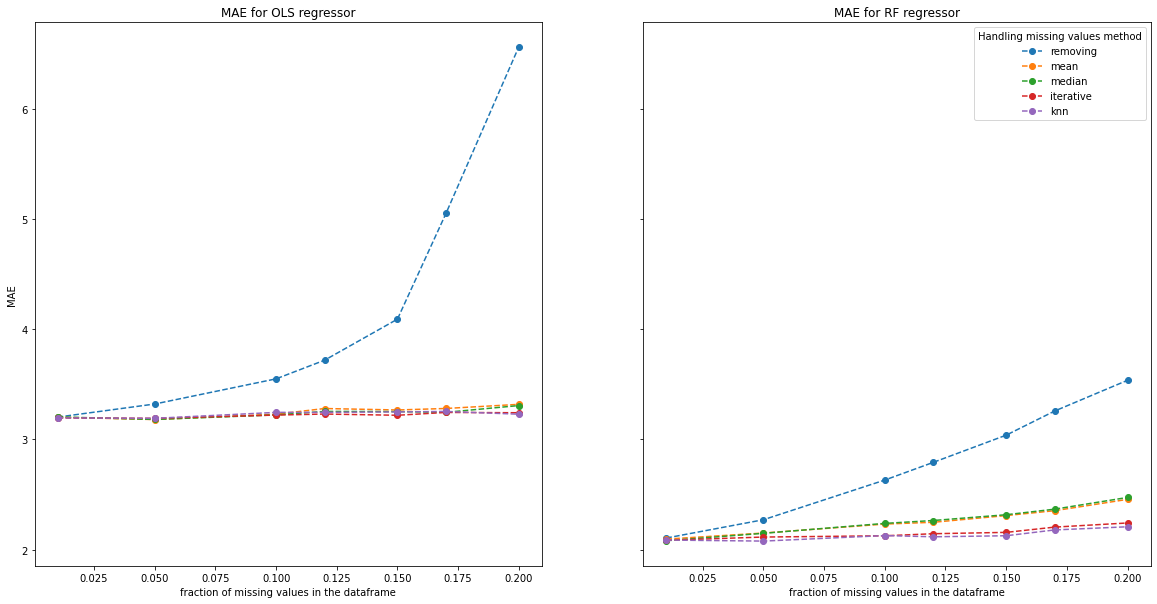

In [29]:
plot_for_metric("mae")

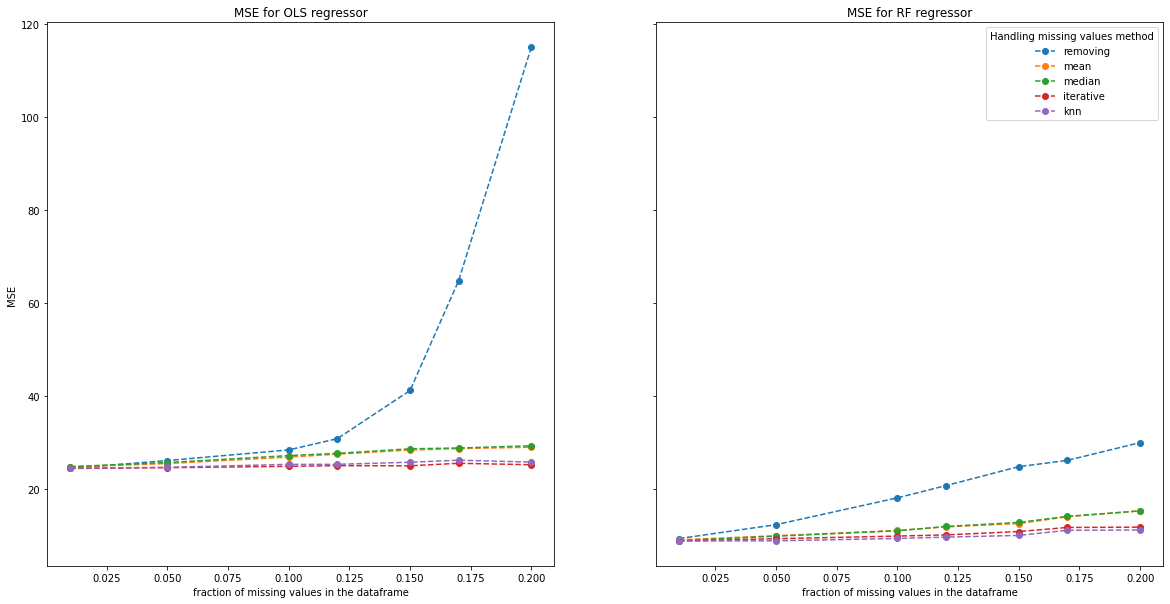

In [30]:
plot_for_metric("mse")

Both above plots (for MSE and MAE) show that data imputation methods performs far better that just removing rows with missing values. The difference is the higher the more missing values is present in the data. 

An important note is the fact that the MSE and MAE are almost the same for all fractions of missing values in case of data imputation methods, while with removing rows with missing values we get aproximately exponential error increase (visible mainly for for Linear Regression, for RandomForest it's maybe more linear). 

For RandomForest and removing data, the error growth rate is definitely smaller than for Linear Regression. What's more, all data imputation methods works better with Random Forest than with LinearRegression. This shows that different regressors have different tollerance for missing values (imputed or removed). 


It's easy to notice, that all data imputation methods works similarly in case of MSE and MAE. That is an iteresting investigation, since it shows that (at least for this dataset), the simplest methods work as good as more complicated ones. 
